### Setup

In [ ]:
import os
import pandas as pd
from datetime import date
from oil_optimization.utils.io_helpers import read_yaml
from datetime import timedelta

def setup():
    config = read_yaml('config/config.yml')
    data_dir = config['data_ingestion']['root_dir']
    raw_data_dir = data_dir + '/raw'
    file_list = os.listdir(raw_data_dir)

    dataframes = {}
    for filename in file_list:
        key = filename[:-4] #Removing .csv extension from filename
        try:
            dataframes[key] = pd.read_csv(f'{raw_data_dir}/{filename}', parse_dates=['period'])
        except FileNotFoundError as e:
            print(e)
            
    return dataframes   

df_dict = setup()
# os.chdir('oil-optimization')
print(os.getcwd())

c:\Users\User\Desktop\DS\Projects\oil-optimization


In [22]:
def plot_values(df,label):
    feature_series = df[['period','value']].set_index('period').rename({'value':label},axis=1)
    feature_series.plot()

### WTI Price

<Axes: xlabel='period'>

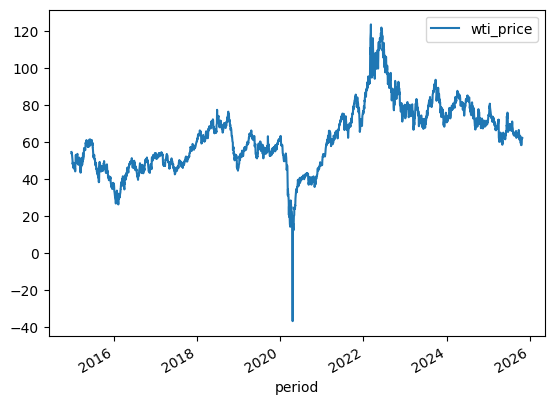

In [18]:
df_wti = df_dict['wti_prices']
wti_series = df_wti[['period','value']].set_index('period').rename({'value':'wti_price'},axis=1)
wti_series.plot()

### Cpi Energy

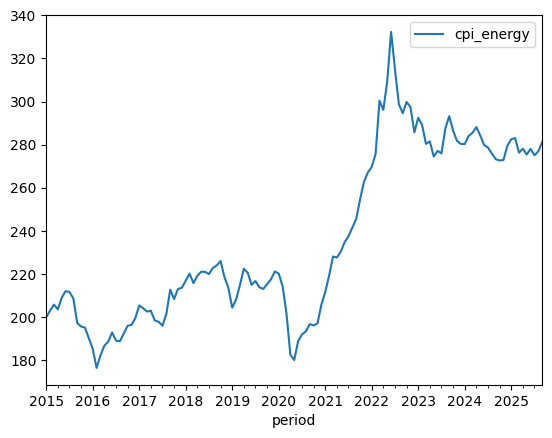

In [29]:
df_cpi = df_dict['cpi_energy']
plot_values(df_cpi, 'cpi_energy')

### Gasoline Price

In [66]:
df_gasoline = df_dict['gasoline_price']
df_filter = df_gasoline[['period','area-name','value']]
df_pivot = df_filter.pivot(columns='area-name',values='value',index='period')
df_pivot

area-name,BOSTON,CALIFORNIA,CHICAGO,CLEVELAND,COLORADO,DENVER,FLORIDA,HOUSTON,LOS ANGELES,MASSACHUSETTS,...,PADD 2,PADD 3,PADD 4,PADD 5,PADD 5 EXCEPT CALIFORNIA,SAN FRANCISCO,SEATTLE,TEXAS,U.S.,WASHINGTON
period,,,,,,,,,,,,,,,,,,,,,
2015-01-05,2.482,2.721,2.264,2.018,2.116,2.127,2.406,2.131,2.783,2.506,...,2.038,2.082,2.182,2.638,2.484,2.799,2.595,2.063,2.308,2.513
2015-01-12,2.393,2.643,2.226,2.065,1.993,2.004,2.307,2.018,2.677,2.412,...,2.018,2.000,2.051,2.547,2.369,2.698,2.503,1.987,2.232,2.399
2015-01-19,2.251,2.532,2.184,2.066,1.932,1.929,2.206,1.954,2.542,2.264,...,1.984,1.933,1.972,2.438,2.265,2.624,2.409,1.918,2.157,2.289
2015-01-26,2.195,2.489,2.195,2.023,1.933,1.930,2.155,1.933,2.505,2.206,...,2.001,1.939,1.934,2.387,2.197,2.590,2.314,1.937,2.133,2.204
2015-02-02,2.178,2.491,2.345,2.130,1.937,1.928,2.148,1.949,2.508,2.184,...,2.093,1.949,1.929,2.386,2.192,2.589,2.278,1.944,2.154,2.162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-29,3.192,4.563,3.667,3.067,3.076,3.059,3.008,2.733,4.572,3.166,...,3.013,2.770,3.239,4.363,4.118,4.591,4.721,2.748,3.248,4.542
2025-10-06,3.164,4.568,3.587,3.047,2.984,2.951,3.077,2.733,4.585,3.141,...,3.019,2.818,3.195,4.353,4.091,4.598,4.687,2.826,3.253,4.508
2025-10-13,3.147,4.575,3.423,2.908,2.932,2.900,2.972,2.687,4.557,3.106,...,2.897,2.722,3.176,4.343,4.059,4.641,4.664,2.688,3.193,4.461


In [ ]:
states = ['CALIFORNIA','COLORADO','FLORIDA','MASSACHUSETTS','OHIO','FLORIDA','TEXAS','MINNESOTA','NEW YORK','WASHINGTON']
cities = ['BOSTON','LOS ANGELES','SAN FRANCISCO','CHICAGO','CLEVELAND','DENVER','MIAMI','HOUSTON','NEW YORK CITY','SEATTLE']
Padds = [f'PADD {i}' for i in range(1,6)]

['PADD 1', 'PADD 2', 'PADD 3', 'PADD 4', 'PADD 5']

In [60]:
import plotly.graph_objects as go
from plotly.colors import n_colors
import numpy as np
import pandas as pd
np.random.seed(1)

# 12 sets of normal distributed random data, with increasing mean and standard deviation

colors = n_colors('rgb(5, 200, 200)', 'rgb(200, 10, 10)', 29, colortype='rgb')

fig = go.Figure()
for data_line, color, zone in zip(df_pivot.T.to_numpy(), colors, df_pivot.columns):
    fig.add_trace(go.Violin(x=data_line, line_color=color, name=zone))

fig.update_traces(orientation='h', side='positive', width=3, points=False)
fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [67]:
df_gasoline

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2015-01-05,R40,PADD 4,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_R40_DPG,Rocky Mountain All Grades All Formulations Ret...,2.182,$/GAL
1,2015-01-05,NUS,U.S.,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_NUS_DPG,U.S. All Grades All Formulations Retail Gasoli...,2.308,$/GAL
2,2015-01-05,Y05SF,SAN FRANCISCO,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_Y05SF_DPG,San Francisco All Grades All Formulations Reta...,2.799,$/GAL
3,2015-01-05,SWA,WASHINGTON,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_SWA_DPG,Washington All Grades All Formulations Retail ...,2.513,$/GAL
4,2015-01-05,Y48SE,SEATTLE,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_Y48SE_DPG,"Seattle, WA All Grades All Formulations Retail...",2.595,$/GAL
...,...,...,...,...,...,...,...,...,...,...,...
16380,2025-10-27,YMIA,MIAMI,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_YMIA_DPG,"Miami, FL All Grades All Formulations Retail G...",3.040,$/GAL
16381,2025-10-27,SCO,COLORADO,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_SCO_DPG,Colorado All Grades All Formulations Retail Ga...,2.945,$/GAL
16382,2025-10-27,SOH,OHIO,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_SOH_DPG,Ohio All Grades All Formulations Retail Gasoli...,3.022,$/GAL
16383,2025-10-27,R10,PADD 1,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_R10_DPG,East Coast All Grades All Formulations Retail ...,3.026,$/GAL


### Imports and Exports

In [87]:
df_imp_exp = df_dict['imports_and_exports']
df_imp_exp

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2015-01-02,R20-Z00,PADD 2,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMP22,Midwest (PADD 2) Commercial Crude Oil Imports ...,2492,MBBL/D
1,2015-01-02,R40-Z00,PADD 4,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMP42,Rocky Mountain (PADD 4) Commercial Crude Oil I...,329,MBBL/D
2,2015-01-02,NUS-Z00,U.S.,EPC0,Crude Oil,EEX,Exports,WCREXUS2,U.S. Exports of Crude Oil (Thousand Barrels pe...,388,MBBL/D
3,2015-01-02,R30-Z00,PADD 3,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMP32,Gulf Coast (PADD 3) Commercial Crude Oil Impor...,2602,MBBL/D
4,2015-01-02,R50-Z00,PADD 5,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMP52,West Coast (PADD 5) Commercial Crude Oil Impor...,731,MBBL/D
...,...,...,...,...,...,...,...,...,...,...,...
6210,2025-10-24,R20-Z00,PADD 2,EPC0,Crude Oil,IMX,Imports Excluding SPR,WCEIMP22,Midwest (PADD 2) Commercial Crude Oil Imports ...,2755,MBBL/D
6211,2025-10-24,NUS-Z00,U.S.,EPC0,Crude Oil,EEX,Exports,WCREXUS2,U.S. Exports of Crude Oil (Thousand Barrels pe...,4361,MBBL/D
6212,2025-10-24,NUS-Z00,U.S.,EPC0,Crude Oil,IM0,Imports,WCRIMUS2,U.S. Imports of Crude Oil (Thousand Barrels pe...,5051,MBBL/D
6213,2025-10-24,NUS-Z00,U.S.,EPC0,Crude Oil,IMN,Net Imports,WCRNTUS2,U.S. Net Imports of Crude Oil (Thousand Barrel...,690,MBBL/D


### Input Utilization

### Oil Production

### U.S. Dollar Index

### Volatility Index

In [85]:
df_dict.keys()

dict_keys(['cpi_energy', 'gasoline_price', 'imports_and_exports', 'input_utilization', 'oil_production', 'us_dollar_index', 'volatility_index', 'wti_prices'])